<a href="https://colab.research.google.com/github/kunal-jain123/TESLA-STOCK-PRICE/blob/main/TESLA_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [15]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/TESLA DATA/TSLA.csv")

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2838,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100
2842,2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12203200


In [ ]:
data.info()

In [7]:
close = data.reset_index()['Close']

In [8]:
close

0         4.392000
1         3.840000
2         3.222000
3         3.160000
4         3.492000
           ...    
2838    785.489990
2839    791.940002
2840    805.719971
2841    811.080017
2842    818.320007
Name: Close, Length: 2843, dtype: float64

In [9]:
close.shape

(2843,)

In [10]:
import matplotlib.pyplot as plt

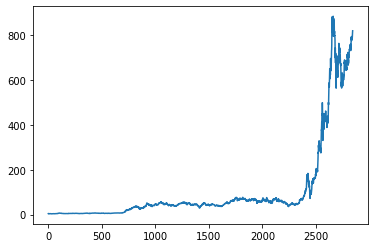

In [11]:
plt.plot(close)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
close1 = scaler.fit_transform(np.array(close).reshape(-1,1))

In [18]:
close1

array([[1.40011133e-03],
       [7.72788721e-04],
       [7.04601481e-05],
       ...,
       [9.12072490e-01],
       [9.18163936e-01],
       [9.26391852e-01]])

In [19]:
close1.shape

(2843, 1)

In [21]:
training_size = int(len(close1)*0.70)
test_size = len(close1)-training_size

In [22]:
train_data,test_data = close1[0:training_size,:],close1[training_size:len(close1),:1]

In [23]:
train_data

array([[1.40011133e-03],
       [7.72788721e-04],
       [7.04601481e-05],
       ...,
       [5.98388478e-02],
       [5.95615542e-02],
       [5.97888450e-02]])

In [24]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [29]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)

In [30]:
X_train.shape

(1889, 100)

In [31]:
y_train.shape

(1889,)

In [32]:
X_test,y_test = create_dataset(test_data,time_step)

In [33]:
X_test.shape

(752, 100)

In [34]:
y_test.shape

(752,)

In [35]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
30/30 [==============================] - 8s 259ms/step - loss: 3.0535e-06 - val_loss: 0.0063
Epoch 2/200
30/30 [==============================] - 6s 203ms/step - loss: 3.1645e-06 - val_loss: 0.0056
Epoch 3/200
30/30 [==============================] - 6s 203ms/step - loss: 3.7957e-06 - val_loss: 0.0052
Epoch 4/200
30/30 [==============================] - 6s 205ms/step - loss: 2.8479e-06 - val_loss: 0.0055
Epoch 5/200
30/30 [==============================] - 6s 204ms/step - loss: 3.0385e-06 - val_loss: 0.0050
Epoch 6/200
30/30 [==============================] - 6s 208ms/step - loss: 3.8087e-06 - val_loss: 0.0051
Epoch 7/200
30/30 [==============================] - 6s 197ms/step - loss: 2.7861e-06 - val_loss: 0.0055
Epoch 8/200
30/30 [==============================] - 6s 198ms/step - loss: 2.8903e-06 - val_loss: 0.0065
Epoch 9/200
30/30 [==============================] - 6s 210ms/step - loss: 2.9274e-06 - val_loss: 0.0053
Epoch 10/200
30/30 [==============================] - 6

In [53]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [54]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [61]:
test_predict[:10]

array([[54.56174 ],
       [52.97646 ],
       [52.262043],
       [52.555958],
       [59.455147],
       [57.891003],
       [63.369705],
       [66.328926],
       [66.96313 ],
       [65.87569 ]], dtype=float32)

In [55]:
import math
from sklearn.metrics import mean_squared_error,r2_score
math.sqrt(mean_squared_error(y_train,train_predict))

40.506728005791345

In [56]:
math.sqrt(mean_squared_error(y_test,test_predict))

374.44898155010367

In [57]:
r2_score(y_test,test_predict)

-1386053.113035819